In [69]:
import os
import pandas as pd
import random
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, balanced_accuracy_score, f1_score, precision_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

In [70]:

def read_and_rename_file(file_path):

    df = pd.read_csv(file_path, skiprows=22, header=None, delimiter='\t')

    df.columns = ['indices', 'velocidade', 'AceleracaoX', 'AceleracaoY', 'AceleracaoZ']

    return df

def determine_damage(filename):
    if filename.startswith("H"):
        return "Saudável"
    elif "0.5X" in filename:
        return "Moderado"
    else:
        return "Severo"

def is_variable_speed(filename):
    return 1 if "VS" in filename else 0

def calculate_variable_speed(index):
    sampling_frequency = 25600
    time = index
    time_in_cycle = time % 2

    if time_in_cycle <= 1.0:
        speed = time_in_cycle * 40
    else:
        speed = 40 - (time_in_cycle - 1) * 40

    return round(speed * 2) / 2

def extract_condition(df, filename):
    if "VS" in filename:
        df['Condição'] = df['indices'].apply(calculate_variable_speed)
    else:
        condition = filename.split('_')[-1].replace('.xls', '').replace('Hz', '')
        df['Condição'] = int(condition) if condition.isdigit() else None
    return df

def list_unique_conditions_vs(df):
    variable_speed_df = df[df['VelocidadeConstante'] == 1]

    if not variable_speed_df.empty:

        condition = pd.to_numeric(variable_speed_df['Condição'], errors='coerce')


        condition_rounded = (condition * 2).round() / 2

        #
        unique_conditions = sorted(set(condition_rounded))

        return unique_conditions
    else:
        print("Nenhuma linha com velocidade variável encontrada.")
        return []



In [71]:

data_dir = "/Users/enzooliveira/Pessoal/VS CODE/IC/raw data"

dataframes = {
    "H": [],
    "I": [],
    "O": [],
    "B": [],
    "C": []
}

for filename in os.listdir(data_dir):
    if filename.endswith(".xls"):
        file_path = os.path.join(data_dir, filename)
        df = read_and_rename_file(file_path)

        df['VelocidadeConstante'] = is_variable_speed(filename)
        df['Dano'] = determine_damage(filename)

        # Aplicar a lógica da condição
        df = extract_condition(df, filename)

        # Classificar por tipo de falha
        if "B" in filename:
            dataframes["B"].append(df)
        elif "I" in filename:
            dataframes["I"].append(df)
        elif "O" in filename:
            dataframes["O"].append(df)
        elif "C" in filename:
            dataframes["C"].append(df)
        elif "H" in filename:
            dataframes["H"].append(df)

def concatenate_dataframes(dfs, label):
    if dfs:
        return pd.concat(dfs, ignore_index=True)
    else:
        print(f"Não há dataframes para concatenar para a classe {label}.")
        return pd.DataFrame()

dfH = concatenate_dataframes(dataframes["H"], "H")
dfI = concatenate_dataframes(dataframes["I"], "I")
dfO = concatenate_dataframes(dataframes["O"], "O")
dfB = concatenate_dataframes(dataframes["B"], "B")
dfC = concatenate_dataframes(dataframes["C"], "C")

/var/folders/2y/w0k2g57j60scys4qmyx_fx0r0000gn/T/ipykernel_41196/2336389116.py:36: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return pd.concat(dfs, ignore_index=True)


In [72]:
dfH

,indices,velocidade,AceleracaoX,AceleracaoY,AceleracaoZ,VelocidadeConstante,Dano,Condição
0,0.000000,0.060175,-0.239702,0.279940,0.145551,0,Saudável,80.0
1,0.000039,0.065404,-0.268383,0.293183,-0.097255,0,Saudável,80.0
2,0.000078,0.061313,-0.228635,0.468781,-0.121527,0,Saudável,80.0
3,0.000117,0.061303,0.025226,0.413938,0.040759,0,Saudável,80.0
4,0.000156,0.058858,0.254310,0.139315,-0.188217,0,Saudável,80.0
...,...,...,...,...,...,...,...,...
2883579,10.239805,0.069014,-0.393199,-0.620606,0.172919,0,Saudável,75.0
2883580,10.239844,0.062312,-0.635457,-0.563633,0.311070,0,Saudável,75.0
2883581,10.239883,0.066663,-0.736516,-0.463044,0.049048,0,Saudável,75.0
2883582,10.239922,0.070647,-0.753268,-0.210160,0.067271,0,Saudável,75.0


In [73]:
dfI

,indices,velocidade,AceleracaoX,AceleracaoY,AceleracaoZ,VelocidadeConstante,Dano,Condição
0,0.000000,0.065052,-0.115529,0.738943,-0.037584,0,Severo,80.0
1,0.000039,0.061232,0.028665,0.291715,0.279809,0,Severo,80.0
2,0.000078,0.061775,0.523473,0.153199,0.518271,0,Severo,80.0
3,0.000117,0.065958,1.213787,0.242365,0.208870,0,Severo,80.0
4,0.000156,0.064536,1.358604,0.284949,0.045595,0,Severo,80.0
...,...,...,...,...,...,...,...,...
5767163,10.239805,4.890587,-0.029801,0.175580,-0.145278,0,Moderado,60.0
5767164,10.239844,5.141302,0.002877,0.110256,-0.051335,0,Moderado,60.0
5767165,10.239883,4.844030,-0.030412,0.063851,0.014404,0,Moderado,60.0
5767166,10.239922,5.185972,-0.168777,0.012044,0.056243,0,Moderado,60.0


In [74]:
dfO

,indices,velocidade,AceleracaoX,AceleracaoY,AceleracaoZ,VelocidadeConstante,Dano,Condição
0,0.000000,5.000662,0.018208,-0.053899,0.002666,0,Moderado,35.0
1,0.000039,4.997633,0.011020,-0.055118,0.002003,0,Moderado,35.0
2,0.000078,4.995195,-0.021766,-0.043858,0.045141,0,Moderado,35.0
3,0.000117,5.001091,-0.038661,-0.030439,0.025063,0,Moderado,35.0
4,0.000156,5.003308,-0.019267,-0.023256,-0.040921,0,Moderado,35.0
...,...,...,...,...,...,...,...,...
5767163,10.239805,4.924739,-0.033027,-0.019465,-0.022164,0,Moderado,20.0
5767164,10.239844,5.039699,-0.024028,-0.019224,-0.020197,0,Moderado,20.0
5767165,10.239883,4.962585,-0.013553,-0.023579,-0.018160,0,Moderado,20.0
5767166,10.239922,5.002675,-0.007066,-0.030715,-0.018084,0,Moderado,20.0


In [75]:
dfB

,indices,velocidade,AceleracaoX,AceleracaoY,AceleracaoZ,VelocidadeConstante,Dano,Condição
0,0.000000,0.062811,-0.005853,0.034844,-0.055663,0,Severo,40.0
1,0.000039,0.065399,0.009108,0.037469,-0.050143,0,Severo,40.0
2,0.000078,0.069251,0.018196,0.040567,-0.015191,0,Severo,40.0
3,0.000117,0.068802,0.050685,0.025236,-0.071849,0,Severo,40.0
4,0.000156,0.066454,-0.023585,0.024446,-0.000025,0,Severo,40.0
...,...,...,...,...,...,...,...,...
5767163,10.239805,-0.005190,-0.046415,-0.063046,-0.033868,0,Moderado,60.0
5767164,10.239844,-0.004647,-0.031819,-0.081929,-0.023448,0,Moderado,60.0
5767165,10.239883,-0.008135,0.016304,-0.076853,0.008646,0,Moderado,60.0
5767166,10.239922,-0.012138,0.039911,-0.046853,0.006356,0,Moderado,60.0


In [76]:
dfC

,indices,velocidade,AceleracaoX,AceleracaoY,AceleracaoZ,VelocidadeConstante,Dano,Condição
0,0.000000,-0.331994,0.835115,-0.049188,0.841090,0,Severo,40.0
1,0.000039,0.298386,0.091268,-0.122089,1.032612,0,Severo,40.0
2,0.000078,-0.082941,-0.171684,-0.032181,1.109399,0,Severo,40.0
3,0.000117,0.149709,0.028730,0.155149,1.051883,0,Severo,40.0
4,0.000156,0.022885,0.390897,0.206493,1.001720,0,Severo,40.0
...,...,...,...,...,...,...,...,...
5767163,10.239805,5.002699,-0.281512,0.179481,-0.175507,0,Moderado,60.0
5767164,10.239844,5.000125,0.013449,0.185089,-0.234294,0,Moderado,60.0
5767165,10.239883,4.999646,0.109414,0.174463,-0.062894,0,Moderado,60.0
5767166,10.239922,4.997449,0.092863,0.082801,-0.049218,0,Moderado,60.0


In [78]:

def print_conditions_and_plot(df, label, duration=10):
    sampling_frequency = 25600

    variable_speed_df = df[df['VelocidadeConstante'] == 1]
    num_points = sampling_frequency * duration
    variable_speed_df = variable_speed_df.head(num_points)

    if not variable_speed_df.empty:
        time = variable_speed_df['indices']
        condition = pd.to_numeric(variable_speed_df['Condição'], errors='coerce')

        condition_rounded = (condition * 2).round() / 2

        unique_conditions = sorted(set(condition_rounded))

        plt.figure(figsize=(10, 6))
        plt.plot(time, condition_rounded, label=f'Condição para {label}')
        plt.xlabel('Tempo (s)')
        plt.ylabel('Condição (Hz)')
        plt.title(f'Condição ao longo do tempo para {label}')
        plt.ylim(0, 40)
        plt.xlim(0, duration)
        plt.legend()
        plt.grid(True)
        plt.show()
    else:
        print(f"Nenhuma linha com velocidade variável para {label}.")


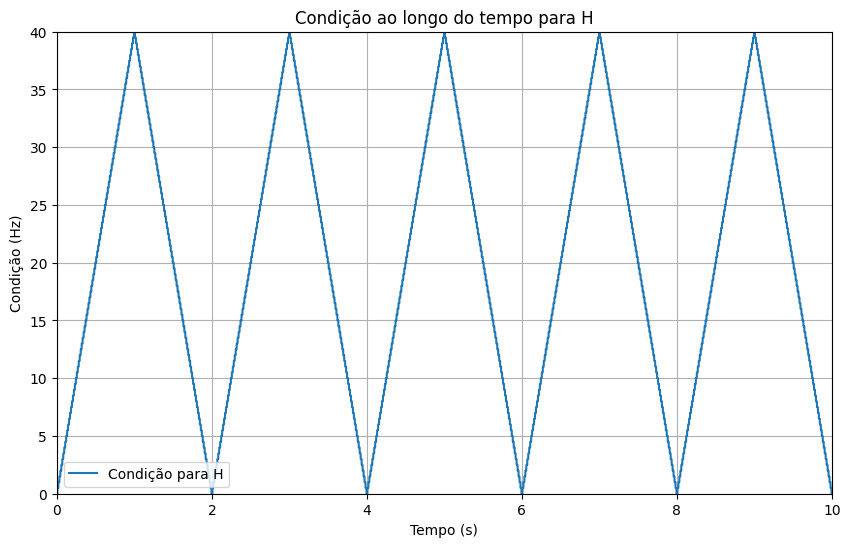

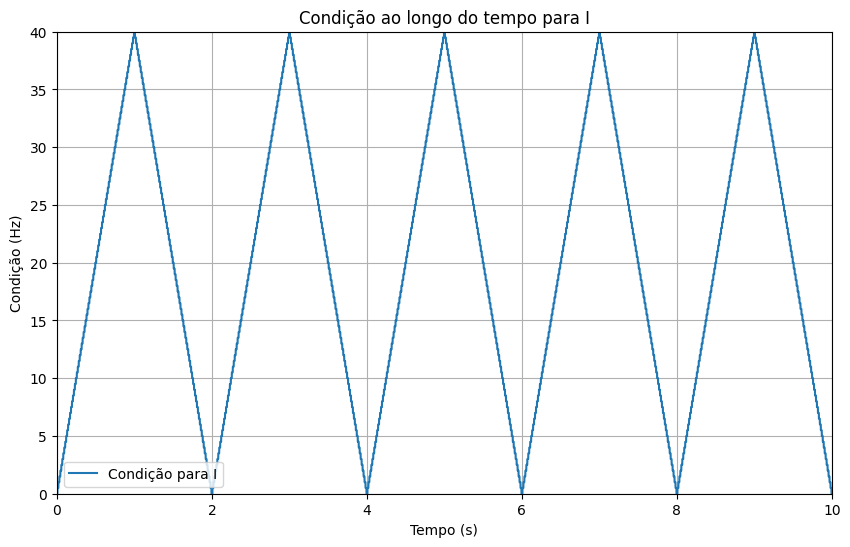

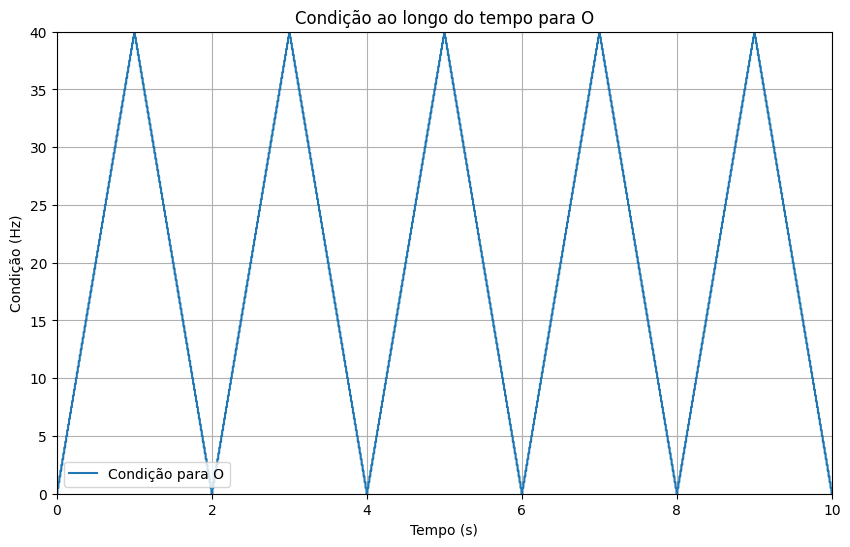

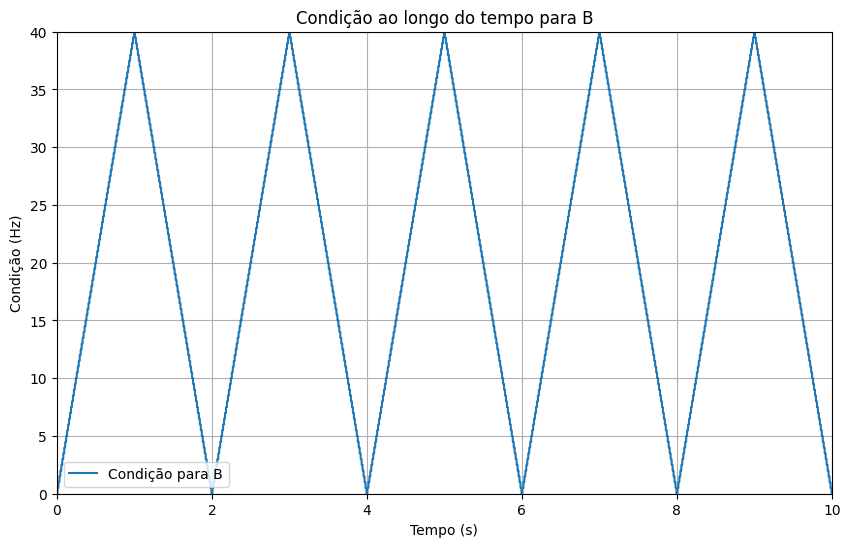

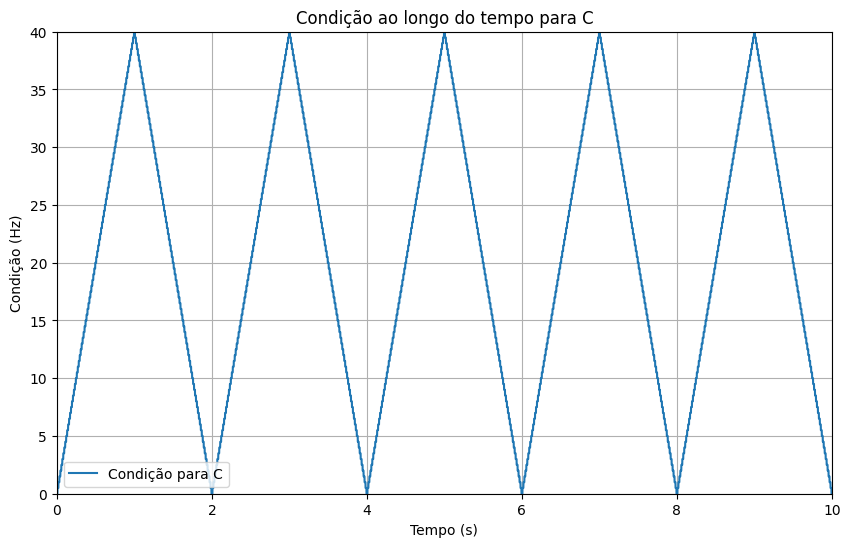

In [79]:

def plot_all_conditions(dataframes):
    for label, df in dataframes.items():
        if not df.empty:
            print_conditions_and_plot(df, label)
        else:
            print(f"Nenhum dado disponível para {label}")


concatenated_dataframes = {
    "H": dfH,
    "I": dfI,
    "O": dfO,
    "B": dfB,
    "C": dfC
}


plot_all_conditions(concatenated_dataframes)

In [80]:

def check_condition_frequencies(df, label):
    filtered_df = df[df['VelocidadeConstante'] == 0]
    if not filtered_df.empty:
        condition_counts = filtered_df['Condição'].value_counts().sort_index()
        print(f"Frequência dos valores de 'Condição' para {label} com VelocidadeConstante = 0:")
        print(condition_counts)
    else:
        print(f"Nenhuma linha com VelocidadeConstante = 0 para {label}")


def analyze_dataframes(dataframes):
    for label, df in dataframes.items():
        if not df.empty:
            check_condition_frequencies(df, label)
        else:
            print(f"Nenhum dado disponível para {label}")


concatenated_dataframes = {
    "H": dfH,
    "I": dfI,
    "O": dfO,
    "B": dfB,
    "C": dfC
}

analyze_dataframes(concatenated_dataframes)

Frequência dos valores de 'Condição' para H com VelocidadeConstante = 0:
Condição
20.0    262144
30.0    262144
35.0    262144
40.0    262144
60.0    262144
65.0    262144
70.0    262144
75.0    262144
80.0    262144
Name: count, dtype: int64
Frequência dos valores de 'Condição' para I com VelocidadeConstante = 0:
Condição
20.0    524288
25.0    524288
30.0    524288
35.0    524288
40.0    524288
60.0    524288
65.0    524288
70.0    524288
75.0    524288
80.0    524288
Name: count, dtype: int64
Frequência dos valores de 'Condição' para O com VelocidadeConstante = 0:
Condição
20.0    524288
25.0    524288
30.0    524288
35.0    524288
40.0    524288
60.0    524288
65.0    524288
70.0    524288
75.0    524288
80.0    524288
Name: count, dtype: int64
Frequência dos valores de 'Condição' para B com VelocidadeConstante = 0:
Condição
20.0    524288
25.0    524288
30.0    524288
35.0    524288
40.0    524288
60.0    524288
65.0    524288
70.0    524288
75.0    524288
80.0    524288
Name: cou

Número de dados em cada dataframe:
H: 2883584
I: 5767168
O: 5767168
B: 5767168
C: 5767168


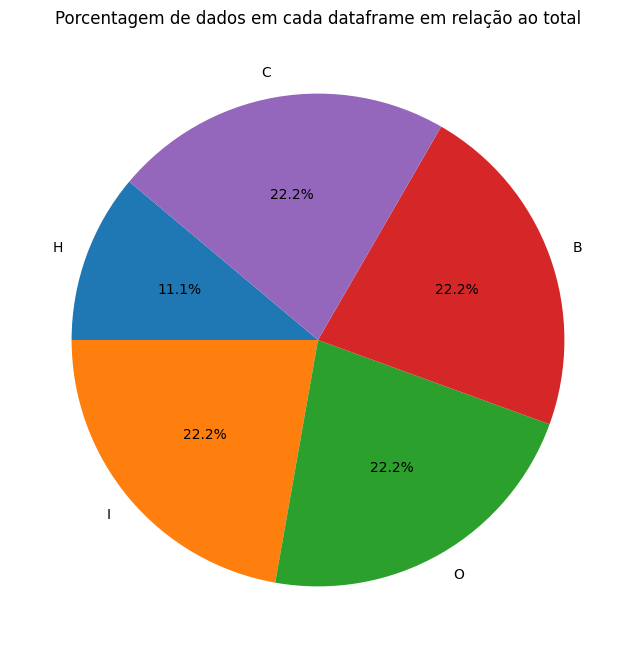

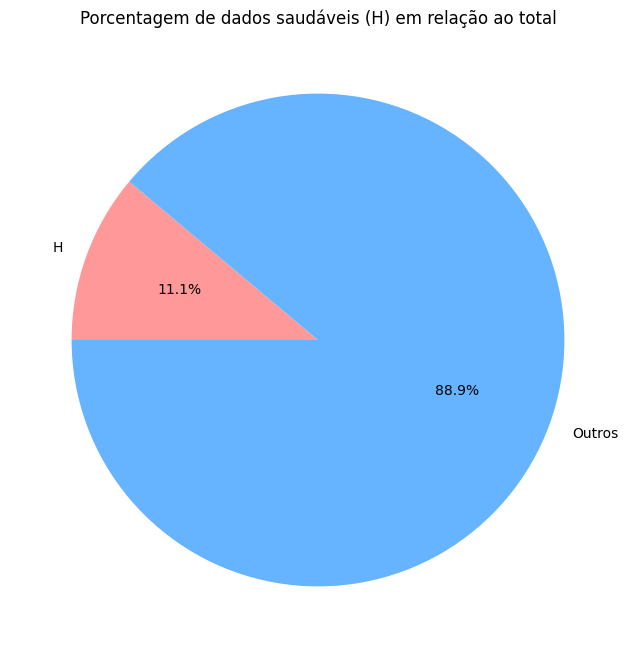

In [81]:
# Função para mostrar quantos dados tem cada dataframe e gerar gráficos de pizza
def show_dataframe_statistics(dataframes):
    total_data = sum(df.shape[0] for df in dataframes.values())
    data_counts = {label: df.shape[0] for label, df in dataframes.items()}

    print("Número de dados em cada dataframe:")
    for label, count in data_counts.items():
        print(f"{label}: {count}")

    # Gráfico de pizza mostrando a porcentagem de cada dataframe em relação ao total
    labels = list(data_counts.keys())
    sizes = list(data_counts.values())
    plt.figure(figsize=(8, 8))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title('Porcentagem de dados em cada dataframe em relação ao total')
    plt.show()

    # Gráfico de pizza mostrando apenas o dfH em relação ao total
    healthy_size = data_counts["H"]
    other_size = total_data - healthy_size
    plt.figure(figsize=(8, 8))
    plt.pie([healthy_size, other_size], labels=["H", "Outros"], autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
    plt.title('Porcentagem de dados saudáveis (H) em relação ao total')
    plt.show()

show_dataframe_statistics(concatenated_dataframes)

In [82]:
def drop_columns(df):
    return df.drop(columns=['indices', 'velocidade', 'VelocidadeConstante', 'Dano'])

dfH = drop_columns(dfH)
dfI = drop_columns(dfI)
dfO = drop_columns(dfO)
dfB = drop_columns(dfB)
dfC = drop_columns(dfC)

In [83]:
dfH

,AceleracaoX,AceleracaoY,AceleracaoZ,Condição
0,-0.239702,0.279940,0.145551,80.0
1,-0.268383,0.293183,-0.097255,80.0
2,-0.228635,0.468781,-0.121527,80.0
3,0.025226,0.413938,0.040759,80.0
4,0.254310,0.139315,-0.188217,80.0
...,...,...,...,...
2883579,-0.393199,-0.620606,0.172919,75.0
2883580,-0.635457,-0.563633,0.311070,75.0
2883581,-0.736516,-0.463044,0.049048,75.0
2883582,-0.753268,-0.210160,0.067271,75.0


In [84]:
dfI

,AceleracaoX,AceleracaoY,AceleracaoZ,Condição
0,-0.115529,0.738943,-0.037584,80.0
1,0.028665,0.291715,0.279809,80.0
2,0.523473,0.153199,0.518271,80.0
3,1.213787,0.242365,0.208870,80.0
4,1.358604,0.284949,0.045595,80.0
...,...,...,...,...
5767163,-0.029801,0.175580,-0.145278,60.0
5767164,0.002877,0.110256,-0.051335,60.0
5767165,-0.030412,0.063851,0.014404,60.0
5767166,-0.168777,0.012044,0.056243,60.0


In [85]:
dfO

,AceleracaoX,AceleracaoY,AceleracaoZ,Condição
0,0.018208,-0.053899,0.002666,35.0
1,0.011020,-0.055118,0.002003,35.0
2,-0.021766,-0.043858,0.045141,35.0
3,-0.038661,-0.030439,0.025063,35.0
4,-0.019267,-0.023256,-0.040921,35.0
...,...,...,...,...
5767163,-0.033027,-0.019465,-0.022164,20.0
5767164,-0.024028,-0.019224,-0.020197,20.0
5767165,-0.013553,-0.023579,-0.018160,20.0
5767166,-0.007066,-0.030715,-0.018084,20.0


In [86]:
dfB

,AceleracaoX,AceleracaoY,AceleracaoZ,Condição
0,-0.005853,0.034844,-0.055663,40.0
1,0.009108,0.037469,-0.050143,40.0
2,0.018196,0.040567,-0.015191,40.0
3,0.050685,0.025236,-0.071849,40.0
4,-0.023585,0.024446,-0.000025,40.0
...,...,...,...,...
5767163,-0.046415,-0.063046,-0.033868,60.0
5767164,-0.031819,-0.081929,-0.023448,60.0
5767165,0.016304,-0.076853,0.008646,60.0
5767166,0.039911,-0.046853,0.006356,60.0


In [87]:
dfC

,AceleracaoX,AceleracaoY,AceleracaoZ,Condição
0,0.835115,-0.049188,0.841090,40.0
1,0.091268,-0.122089,1.032612,40.0
2,-0.171684,-0.032181,1.109399,40.0
3,0.028730,0.155149,1.051883,40.0
4,0.390897,0.206493,1.001720,40.0
...,...,...,...,...
5767163,-0.281512,0.179481,-0.175507,60.0
5767164,0.013449,0.185089,-0.234294,60.0
5767165,0.109414,0.174463,-0.062894,60.0
5767166,0.092863,0.082801,-0.049218,60.0


In [88]:
dataframes = [dfH, dfI, dfO, dfB, dfC]
names = ['dfH', 'dfI', 'dfO', 'dfB', 'dfC']

def check_missing_values(dfs, names):
    for df, name in zip(dfs, names):
        missing_values = df.isnull().sum()
        total_missing = missing_values.sum()
        if total_missing > 0:
            print(f"Valores faltantes em {name}:")
            print(missing_values)
        else:
            print(f"Não há valores faltantes em {name}.")

check_missing_values(dataframes, names)

Valores faltantes em dfH:
AceleracaoX         0
AceleracaoY         0
AceleracaoZ         0
Condição       262144
dtype: int64
Não há valores faltantes em dfI.
Não há valores faltantes em dfO.
Não há valores faltantes em dfB.
Não há valores faltantes em dfC.


In [89]:
dataframes = [dfH, dfI, dfO, dfB, dfC]
names = ['dfH', 'dfI', 'dfO', 'dfB', 'dfC']

def check_and_fill_missing_values(dfs, names):
    for df, name in zip(dfs, names):
        missing_values = df.isnull().sum()
        total_missing = missing_values.sum()
        if total_missing > 0:
            if 'Condição' in df.columns:
                df['Condição'].fillna(25, inplace=True)
        else:
            print(f"Não há valores faltantes em {name}.")

check_and_fill_missing_values(dataframes, names)

Não há valores faltantes em dfI.
Não há valores faltantes em dfO.
Não há valores faltantes em dfB.
Não há valores faltantes em dfC.


/var/folders/2y/w0k2g57j60scys4qmyx_fx0r0000gn/T/ipykernel_41196/1770272366.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Condição'].fillna(25, inplace=True)


In [90]:

def read_and_rename_file(file_path):
    df = pd.read_csv(file_path, skiprows=22, header=None, delimiter='\t')
    df.columns = ['indices', 'velocidade', 'AceleracaoX', 'AceleracaoY', 'AceleracaoZ']
    return df

data_dir = "/Users/enzooliveira/Pessoal/VS CODE/IC/raw data"

def select_files_by_frequency(prefix, frequencies):
    selected_files = []
    for freq in frequencies:
        files = [filename for filename in os.listdir(data_dir) if filename.startswith(prefix) and f"{freq}Hz" in filename]
        if files:
            selected_files.append(random.choice(files))
    return selected_files

frequencies = [60, 70, 80]
healthy_files = select_files_by_frequency("H", frequencies)
damaged_files = select_files_by_frequency("B", frequencies)

all_files = healthy_files + damaged_files
labels = [0] * len(healthy_files) + [1] * len(damaged_files)

In [91]:
healthy_files

['H_60Hz.xls', 'H_70Hz.xls', 'H_80Hz.xls']

In [92]:
damaged_files

['B_60Hz.xls', 'B_70Hz.xls', 'B_80Hz.xls']

In [98]:
def create_sliding_windows(df, window_size, step_size):
    X, y = [], []
    for i in range(0, len(df) - window_size + 1, step_size):
        window = df.iloc[i:i + window_size]
        X.append(window[['AceleracaoX', 'AceleracaoY', 'AceleracaoZ', 'Velocidade']].values)
        y.append(window['Label'].values[-1])
    return np.array(X), np.array(y)
    
window_size = 100
step_size = 50
split_ratio = 0.9
X_train_list, y_train_list = [], []
X_test_list, y_test_list = [], []


for file_path, label in zip(all_files, labels):
    df = read_and_rename_file(os.path.join(data_dir, file_path))

    frequency = int([f for f in frequencies if f"{f}Hz" in file_path][0])
    df['Velocidade'] = frequency

    df['Label'] = label

  
    train_size = int(len(df) * split_ratio)
    train_data = df[:train_size]
    test_data = df[train_size:]

    
    X_train, y_train = create_sliding_windows(train_data, window_size, step_size)
    X_train_list.append(X_train)
    y_train_list.append(y_train)

    
    X_test, y_test = create_sliding_windows(test_data, window_size, step_size)
    X_test_list.append(X_test)
    y_test_list.append(y_test)

In [99]:
X_train = np.vstack(X_train_list)
y_train = np.hstack(y_train_list)
X_test = np.vstack(X_test_list)
y_test = np.hstack(y_test_list)

if len(X_train) != len(y_train):
    raise ValueError(f"Mismatch in combined train data shapes: {len(X_train)} != {len(y_train)}")
if len(X_test) != len(y_test):
    raise ValueError(f"Mismatch in combined test data shapes: {len(X_test)} != {len(y_test)}")

indices_train = np.arange(X_train.shape[0])
np.random.shuffle(indices_train)
X_train = X_train[indices_train]
y_train = y_train[indices_train]

indices_test = np.arange(X_test.shape[0])
np.random.shuffle(indices_test)
X_test = X_test[indices_test]
y_test = y_test[indices_test]

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
X_test = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (28302, 100, 4)
Shape of y_train: (28302,)
Shape of X_test: (3138, 100, 4)
Shape of y_test: (3138,)


In [100]:
model = Sequential()
model.add(LSTM(120, input_shape=(window_size, 4), return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(60, return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

y_pred = (model.predict(X_test) > 0.5).astype("int32")

Epoch 1/10


/opt/anaconda3/envs/tf-metal/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


885/885 ━━━━━━━━━━━━━━━━━━━━ 18s 20ms/step - accuracy: 0.5332 - loss: 0.6902 - val_accuracy: 0.5048 - val_loss: 0.6821
Epoch 2/10
885/885 ━━━━━━━━━━━━━━━━━━━━ 17s 19ms/step - accuracy: 0.5351 - loss: 0.6827 - val_accuracy: 0.5599 - val_loss: 0.6629
Epoch 3/10
885/885 ━━━━━━━━━━━━━━━━━━━━ 16s 19ms/step - accuracy: 0.5680 - loss: 0.6620 - val_accuracy: 0.6103 - val_loss: 0.6289
Epoch 4/10
885/885 ━━━━━━━━━━━━━━━━━━━━ 17s 19ms/step - accuracy: 0.5951 - loss: 0.6386 - val_accuracy: 0.6950 - val_loss: 0.5718
Epoch 5/10
885/885 ━━━━━━━━━━━━━━━━━━━━ 17s 19ms/step - accuracy: 0.6935 - loss: 0.5546 - val_accuracy: 0.8821 - val_loss: 0.2934
Epoch 6/10
885/885 ━━━━━━━━━━━━━━━━━━━━ 17s 19ms/step - accuracy: 0.8465 - loss: 0.3554 - val_accuracy: 0.7741 - val_loss: 0.4009
Epoch 7/10
885/885 ━━━━━━━━━━━━━━━━━━━━ 17s 19ms/step - accuracy: 0.8109 - loss: 0.3554 - val_accuracy: 0.9414 - val_loss: 0.1573
Epoch 8/10
885/885 ━━━━━━━━━━━━━━━━━━━━ 17s 19ms/step - accuracy: 0.9334 - loss: 0.1765 - val_accurac

        MSE       MAE  Accuracy  Balanced Accuracy  F1 Score  Precision
0  0.011154  0.011154  0.988846           0.988846  0.988728   0.999349


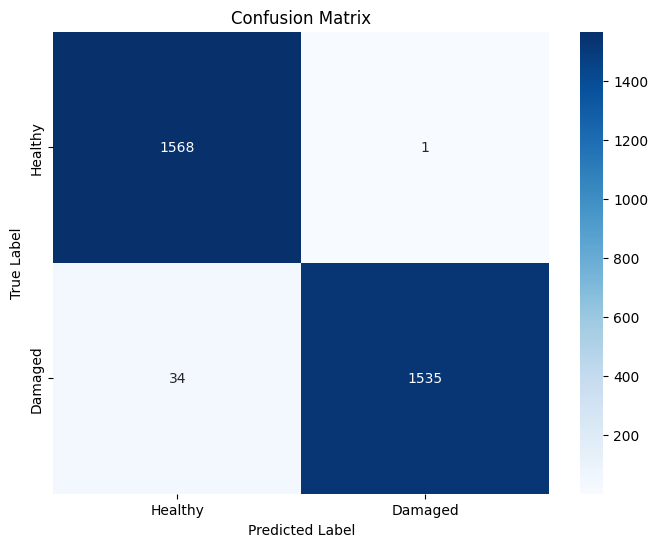

In [ ]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

metrics = {
    "MSE": [mse],
    "MAE": [mae],
    "Accuracy": [accuracy],
    "Balanced Accuracy": [balanced_accuracy],
    "F1 Score": [f1],
    "Precision": [precision]
}

metrics_df = pd.DataFrame(metrics)
print(metrics_df)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Healthy', 'Damaged'], yticklabels=['Healthy', 'Damaged'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
def create_sliding_windows(df, window_size, step_size):
    X, y = [], []
    for i in range(0, len(df) - window_size + 1, step_size):
        window = df.iloc[i:i + window_size]
        X.append(window[['AceleracaoX', 'AceleracaoY', 'AceleracaoZ', 'Velocidade']].values)
        y.append(window['Label'].values[-1])  # Usa o último valor da janela como rótulo
    return np.array(X), np.array(y)

split_ratio = 0.9
def split_train_test(df_list, split_ratio):
    train, test = [], []
    for df in df_list:
        split_index = int(len(df) * split_ratio)
        train.append(df.iloc[:split_index])
        test.append(df.iloc[split_index:])
    return train, test

dataframes = []
for file, label in zip(all_files, labels):
    df = read_and_rename_file(os.path.join(data_dir, file))
    df['Label'] = label
    frequency = int([f for f in frequencies if f"{f}Hz" in file][0])
    df['Velocidade'] = frequency
    dataframes.append(df)

train_dfs, test_dfs = split_train_test(dataframes, split_ratio)

window_sizes = [50, 100, 150, 200]
step_sizes = [50, 100, 150, 200, 250]

total_combinations = len(window_sizes) * len(step_sizes)
metrics_list = []

combination_counter = 0

for window_size in window_sizes:
    for step_size in step_sizes:
        combination_counter += 1
        remaining_combinations = total_combinations - combination_counter
        print(f"Processing combination {combination_counter}/{total_combinations} (Remaining: {remaining_combinations}): Window Size = {window_size}, Step Size = {step_size}")

        X_train_list, y_train_list = [], []
        X_test_list, y_test_list = [], []

        for train_data, test_data in zip(train_dfs, test_dfs):
            X_train, y_train = create_sliding_windows(train_data, window_size, step_size)
            X_train_list.append(X_train)
            y_train_list.append(y_train)

            X_test, y_test = create_sliding_windows(test_data, window_size, step_size)
            X_test_list.append(X_test)
            y_test_list.append(y_test)

        X_train = np.vstack(X_train_list)
        y_train = np.hstack(y_train_list)
        X_test = np.vstack(X_test_list)
        y_test = np.hstack(y_test_list)

        if len(X_train) != len(y_train):
            raise ValueError(f"Mismatch in combined train data shapes: {len(X_train)} != {len(y_train)}")
        if len(X_test) != len(y_test):
            raise ValueError(f"Mismatch in combined test data shapes: {len(X_test)} != {len(y_test)}")

        indices_train = np.arange(X_train.shape[0])
        np.random.shuffle(indices_train)
        X_train = X_train[indices_train]
        y_train = y_train[indices_train]

        indices_test = np.arange(X_test.shape[0])
        np.random.shuffle(indices_test)
        X_test = X_test[indices_test]
        y_test = y_test[indices_test]

        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
        X_test = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

        model = Sequential()
        model.add(LSTM(120, input_shape=(window_size, 4), return_sequences=True))
        model.add(Dropout(0.3))
        model.add(LSTM(60, return_sequences=False))
        model.add(Dropout(0.3))
        model.add(Dense(1, activation='sigmoid'))

        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

        model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=0)

        y_pred = (model.predict(X_test) > 0.5).astype("int32")
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        accuracy = accuracy_score(y_test, y_pred)
        balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)

        metrics_list.append({"Window Size": window_size, "Step Size": step_size, "MSE": mse, "MAE": mae, "Accuracy": accuracy, "Balanced Accuracy": balanced_accuracy, "F1 Score": f1, "Precision": precision})

metrics_df = pd.DataFrame(metrics_list)
metrics_df

Processing combination 1/20 (Remaining: 19): Window Size = 50, Step Size = 50


/opt/anaconda3/envs/tf-metal/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Processing combination 2/20 (Remaining: 18): Window Size = 50, Step Size = 100


/opt/anaconda3/envs/tf-metal/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Processing combination 3/20 (Remaining: 17): Window Size = 50, Step Size = 150


/opt/anaconda3/envs/tf-metal/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Processing combination 4/20 (Remaining: 16): Window Size = 50, Step Size = 200


/opt/anaconda3/envs/tf-metal/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Processing combination 5/20 (Remaining: 15): Window Size = 50, Step Size = 250


/opt/anaconda3/envs/tf-metal/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Processing combination 6/20 (Remaining: 14): Window Size = 100, Step Size = 50


/opt/anaconda3/envs/tf-metal/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
Processing combination 7/20 (Remaining: 13): Window Size = 100, Step Size = 100


/opt/anaconda3/envs/tf-metal/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Processing combination 8/20 (Remaining: 12): Window Size = 100, Step Size = 150


/opt/anaconda3/envs/tf-metal/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step
Processing combination 9/20 (Remaining: 11): Window Size = 100, Step Size = 200


/opt/anaconda3/envs/tf-metal/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Processing combination 10/20 (Remaining: 10): Window Size = 100, Step Size = 250


/opt/anaconda3/envs/tf-metal/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Processing combination 11/20 (Remaining: 9): Window Size = 150, Step Size = 50


/opt/anaconda3/envs/tf-metal/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
Processing combination 12/20 (Remaining: 8): Window Size = 150, Step Size = 100


/opt/anaconda3/envs/tf-metal/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
Processing combination 13/20 (Remaining: 7): Window Size = 150, Step Size = 150


/opt/anaconda3/envs/tf-metal/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Processing combination 14/20 (Remaining: 6): Window Size = 150, Step Size = 200


/opt/anaconda3/envs/tf-metal/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Processing combination 15/20 (Remaining: 5): Window Size = 150, Step Size = 250


/opt/anaconda3/envs/tf-metal/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Processing combination 16/20 (Remaining: 4): Window Size = 200, Step Size = 50


/opt/anaconda3/envs/tf-metal/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
Processing combination 17/20 (Remaining: 3): Window Size = 200, Step Size = 100


/opt/anaconda3/envs/tf-metal/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
Processing combination 18/20 (Remaining: 2): Window Size = 200, Step Size = 150


/opt/anaconda3/envs/tf-metal/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Processing combination 19/20 (Remaining: 1): Window Size = 200, Step Size = 200


/opt/anaconda3/envs/tf-metal/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Processing combination 20/20 (Remaining: 0): Window Size = 200, Step Size = 250


/opt/anaconda3/envs/tf-metal/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


,Window Size,Step Size,MSE,MAE,Accuracy,Balanced Accuracy,F1 Score,Precision
0,50,50,0.043893,0.043893,0.956107,0.956107,0.957063,0.936663
1,50,100,0.040076,0.040076,0.959924,0.959924,0.958850,0.985235
2,50,150,0.047619,0.047619,0.952381,0.952381,0.952381,0.952381
3,50,200,0.075064,0.075064,0.924936,0.924936,0.922470,0.953804
4,50,250,0.052381,0.052381,0.947619,0.947619,0.948678,0.929878
5,100,50,0.010198,0.010198,0.989802,0.989802,0.989880,0.982423
6,100,100,0.019084,0.019084,0.980916,0.980916,0.980670,0.993473
7,100,150,0.021905,0.021905,0.978095,0.978095,0.978404,0.964815
8,100,200,0.033079,0.033079,0.966921,0.966921,0.967662,0.946472
9,100,250,0.084127,0.084127,0.915873,0.915873,0.914654,0.928105


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

best_mse = metrics_df["MSE"].min()
best_mae = metrics_df["MAE"].min()
best_accuracy = metrics_df["Accuracy"].max()
best_balanced_accuracy = metrics_df["Balanced Accuracy"].max()
best_f1 = metrics_df["F1 Score"].max()
best_precision = metrics_df["Precision"].max()


def highlight_best(data):
    attr = 'background-color: red'
    is_best = pd.DataFrame('', index=data.index, columns=data.columns)
    is_best.loc[data['MSE'].idxmin(), 'MSE'] = attr
    is_best.loc[data['MAE'].idxmin(), 'MAE'] = attr
    is_best.loc[data['Accuracy'].idxmax(), 'Accuracy'] = attr
    is_best.loc[data['Balanced Accuracy'].idxmax(), 'Balanced Accuracy'] = attr
    is_best.loc[data['F1 Score'].idxmax(), 'F1 Score'] = attr
    is_best.loc[data['Precision'].idxmax(), 'Precision'] = attr
    return is_best

styled_metrics_df = metrics_df.style.apply(highlight_best, axis=None)

styled_metrics_df

,Window Size,Step Size,MSE,MAE,Accuracy,Balanced Accuracy,F1 Score,Precision
0,50,50,0.043893,0.043893,0.956107,0.956107,0.957063,0.936663
1,50,100,0.040076,0.040076,0.959924,0.959924,0.958850,0.985235
2,50,150,0.047619,0.047619,0.952381,0.952381,0.952381,0.952381
3,50,200,0.075064,0.075064,0.924936,0.924936,0.922470,0.953804
4,50,250,0.052381,0.052381,0.947619,0.947619,0.948678,0.929878
5,100,50,0.010198,0.010198,0.989802,0.989802,0.989880,0.982423
6,100,100,0.019084,0.019084,0.980916,0.980916,0.980670,0.993473
7,100,150,0.021905,0.021905,0.978095,0.978095,0.978404,0.964815
8,100,200,0.033079,0.033079,0.966921,0.966921,0.967662,0.946472
9,100,250,0.084127,0.084127,0.915873,0.915873,0.914654,0.928105


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, balanced_accuracy_score, f1_score, precision_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense

def create_sliding_windows(df, window_size, step_size):
    X, y = [], []
    for i in range(0, len(df) - window_size + 1, step_size):
        window = df.iloc[i:i + window_size]
        X.append(window[['AceleracaoX', 'AceleracaoY', 'AceleracaoZ', 'Velocidade']].values)
        y.append(window['Label'].values[-1])  
    return np.array(X), np.array(y)

split_ratio = 0.9
def split_train_test(df_list, split_ratio):
    train, test = [], []
    for df in df_list:
        split_index = int(len(df) * split_ratio)
        train.append(df.iloc[:split_index])
        test.append(df.iloc[split_index:])
    return train, test

dataframes = []
for file, label in zip(all_files, labels):
    df = read_and_rename_file(os.path.join(data_dir, file))
    df['Label'] = label
    frequency = int([f for f in frequencies if f"{f}Hz" in file][0])
    df['Velocidade'] = frequency
    dataframes.append(df)

train_dfs, test_dfs = split_train_test(dataframes, split_ratio)

window_size = 200
step_size = 50

X_train_list, y_train_list = [], []
X_test_list, y_test_list = [], []

for train_data, test_data in zip(train_dfs, test_dfs):
    X_train, y_train = create_sliding_windows(train_data, window_size, step_size)
    X_train_list.append(X_train)
    y_train_list.append(y_train)

    X_test, y_test = create_sliding_windows(test_data, window_size, step_size)
    X_test_list.append(X_test)
    y_test_list.append(y_test)

X_train = np.vstack(X_train_list)
y_train = np.hstack(y_train_list)
X_test = np.vstack(X_test_list)
y_test = np.hstack(y_test_list)

if len(X_train) != len(y_train):
    raise ValueError(f"Mismatch in combined train data shapes: {len(X_train)} != {len(y_train)}")
if len(X_test) != len(y_test):
    raise ValueError(f"Mismatch in combined test data shapes: {len(X_test)} != {len(y_test)}")

indices_train = np.arange(X_train.shape[0])
np.random.shuffle(indices_train)
X_train = X_train[indices_train]
y_train = y_train[indices_train]

indices_test = np.arange(X_test.shape[0])
np.random.shuffle(indices_test)
X_test = X_test[indices_test]
y_test = y_test[indices_test]

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
X_test = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

models_to_test = [
    {"name": "LSTM(50)", "layers": [LSTM(50, input_shape=(window_size, 4)), Dense(1, activation='sigmoid')]},
    {"name": "LSTM(100)", "layers": [LSTM(100, input_shape=(window_size, 4)), Dense(1, activation='sigmoid')]},
    {"name": "LSTM(128)", "layers": [LSTM(128, input_shape=(window_size, 4)), Dense(1, activation='sigmoid')]},
    {"name": "LSTM(50) + Dropout(0.2)", "layers": [LSTM(50, input_shape=(window_size, 4)), Dropout(0.2), Dense(1, activation='sigmoid')]},
    {"name": "LSTM(100) + Dropout(0.3)", "layers": [LSTM(100, input_shape=(window_size, 4)), Dropout(0.3), Dense(1, activation='sigmoid')]},
    {"name": "LSTM(128) + Dropout(0.5)", "layers": [LSTM(128, input_shape=(window_size, 4)), Dropout(0.5), Dense(1, activation='sigmoid')]},
    {"name": "LSTM(50) + LSTM(50)", "layers": [LSTM(50, return_sequences=True, input_shape=(window_size, 4)), LSTM(50), Dense(1, activation='sigmoid')]},
    {"name": "LSTM(100) + LSTM(100)", "layers": [LSTM(100, return_sequences=True, input_shape=(window_size, 4)), LSTM(100), Dense(1, activation='sigmoid')]},
    {"name": "LSTM(128) + LSTM(128)", "layers": [LSTM(128, return_sequences=True, input_shape=(window_size, 4)), LSTM(128), Dense(1, activation='sigmoid')]},
    {"name": "LSTM(50) + Dropout(0.2) + LSTM(50) + Dropout(0.2)", "layers": [LSTM(50, return_sequences=True, input_shape=(window_size, 4)), Dropout(0.2), LSTM(50), Dropout(0.2), Dense(1, activation='sigmoid')]},
    {"name": "LSTM(100) + Dropout(0.3) + LSTM(100) + Dropout(0.3)", "layers": [LSTM(100, return_sequences=True, input_shape=(window_size, 4)), Dropout(0.3), LSTM(100), Dropout(0.3), Dense(1, activation='sigmoid')]},
    {"name": "LSTM(128) + Dropout(0.5) + LSTM(128) + Dropout(0.5)", "layers": [LSTM(128, return_sequences=True, input_shape=(window_size, 4)), Dropout(0.5), LSTM(128), Dropout(0.5), Dense(1, activation='sigmoid')]},
    {"name": "LSTM(120) + Dropout(0.3) + LSTM(60) + Dropout(0.3)", "layers": [LSTM(120, return_sequences=True, input_shape=(window_size, 4)), Dropout(0.3), LSTM(60), Dropout(0.3), Dense(1, activation='sigmoid')]}
]

metrics_list = []

for model_config in models_to_test:
    model_name = model_config["name"]
    layers = model_config["layers"]

    print(f"Training model: {model_name}")
    
    model = Sequential()
    for layer in layers:
        model.add(layer)

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=0)

    y_pred = (model.predict(X_test) > 0.5).astype("int32")

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    metrics_list.append({"Model": model_name, "MSE": mse, "MAE": mae, "Accuracy": accuracy, "Balanced Accuracy": balanced_accuracy, "F1 Score": f1, "Precision": precision})

metrics_df = pd.DataFrame(metrics_list)
metrics_df

/opt/anaconda3/envs/tf-metal/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training model: LSTM(50)
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Training model: LSTM(100)
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
Training model: LSTM(128)
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
Training model: LSTM(50) + Dropout(0.2)
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
Training model: LSTM(100) + Dropout(0.3)
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
Training model: LSTM(128) + Dropout(0.5)
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
Training model: LSTM(50) + LSTM(50)
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
Training model: LSTM(100) + LSTM(100)
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
Training model: LSTM(128) + LSTM(128)
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
Training model: LSTM(50) + Dropout(0.2) + LSTM(50) + Dropout(0.2)
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
Training model: LSTM(100) + Dropout(0.3) + LSTM(100) + Dropout(0.3)
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
Training model: LSTM(128) + Dropout(0.5) + LSTM(128) + Dropout(0.5)
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
Training model: 

,Model,MSE,MAE,Accuracy,Balanced Accuracy,F1 Score,Precision
0,LSTM(50),0.308061,0.308061,0.691939,0.691939,0.742720,0.637615
1,LSTM(100),0.003839,0.003839,0.996161,0.996161,0.996171,0.993635
2,LSTM(128),0.028151,0.028151,0.971849,0.971849,0.971867,0.971246
3,LSTM(50) + Dropout(0.2),0.467051,0.467051,0.532949,0.532949,0.612527,0.523356
4,LSTM(100) + Dropout(0.3),0.200576,0.200576,0.799424,0.799424,0.814112,0.758564
5,LSTM(128) + Dropout(0.5),0.008317,0.008317,0.991683,0.991683,0.991720,0.987318
6,LSTM(50) + LSTM(50),0.121881,0.121881,0.878119,0.878119,0.885068,0.837329
7,LSTM(100) + LSTM(100),0.002239,0.002239,0.997761,0.997761,0.997760,0.998079
8,LSTM(128) + LSTM(128),0.408509,0.408509,0.591491,0.591491,0.453573,0.684755
9,LSTM(50) + Dropout(0.2) + LSTM(50) + Dropout(0.2),0.020473,0.020473,0.979527,0.979527,0.979760,0.968730


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

best_mse = metrics_df["MSE"].min()
best_mae = metrics_df["MAE"].min()
best_accuracy = metrics_df["Accuracy"].max()
best_balanced_accuracy = metrics_df["Balanced Accuracy"].max()
best_f1 = metrics_df["F1 Score"].max()
best_precision = metrics_df["Precision"].max()

def highlight_best(data):
    attr = 'background-color: red'
    is_best = pd.DataFrame('', index=data.index, columns=data.columns)
    is_best.loc[data['MSE'].idxmin(), 'MSE'] = attr
    is_best.loc[data['MAE'].idxmin(), 'MAE'] = attr
    is_best.loc[data['Accuracy'].idxmax(), 'Accuracy'] = attr
    is_best.loc[data['Balanced Accuracy'].idxmax(), 'Balanced Accuracy'] = attr
    is_best.loc[data['F1 Score'].idxmax(), 'F1 Score'] = attr
    is_best.loc[data['Precision'].idxmax(), 'Precision'] = attr
    return is_best

styled_metrics_df = metrics_df.style.apply(highlight_best, axis=None)

styled_metrics_df

,Model,MSE,MAE,Accuracy,Balanced Accuracy,F1 Score,Precision
0,LSTM(50),0.015267,0.015267,0.984733,0.984731,0.984781,0.982290
1,LSTM(100),0.012723,0.012723,0.987277,0.987279,0.987245,0.990403
2,LSTM(128),0.004135,0.004135,0.995865,0.995864,0.995877,0.993671
3,LSTM(50) + Dropout(0.2),0.016858,0.016858,0.983142,0.983147,0.983040,0.989691
4,LSTM(100) + Dropout(0.3),0.005089,0.005089,0.994911,0.994914,0.994891,0.999359
5,LSTM(128) + Dropout(0.5),0.015903,0.015903,0.984097,0.984093,0.984207,0.978029
6,LSTM(50) + LSTM(50),0.009224,0.009224,0.990776,0.990781,0.990708,0.998708
7,LSTM(100) + LSTM(100),0.011132,0.011132,0.988868,0.988865,0.988914,0.985480
8,LSTM(128) + LSTM(128),0.013677,0.013677,0.986323,0.986318,0.986431,0.979323
9,LSTM(50) + Dropout(0.2) + LSTM(50) + Dropout(0.2),0.008906,0.008906,0.991094,0.991097,0.991054,0.996146


In [29]:
def list_healthy_files(data_dir):
    healthy_files = [filename for filename in os.listdir(data_dir) if filename.startswith("H") and "0_5X" not in filename]
    return healthy_files

data_dir = "/Users/enzooliveira/Pessoal/VS CODE/IC/raw data"
healthy_files = list_healthy_files(data_dir)
print("Arquivos Saudáveis Selecionados:", healthy_files)

Arquivos Saudáveis Selecionados: ['H_80Hz.xls', 'H_40Hz.xls', 'H_60Hz.xls', 'H_25hz.xls', 'H_VS_0_40_0Hz.xls', 'H_20Hz.xls', 'H_65Hz.xls', 'H_70Hz.xls', 'H_35Hz.xls', 'H_30Hz.xls', 'H_75Hz.xls']


In [30]:
def read_and_rename_file(file_path):
    df = pd.read_csv(file_path, skiprows=22, header=None, delimiter='\t')
    df.columns = ['indices', 'velocidade', 'AceleracaoX', 'AceleracaoY', 'AceleracaoZ']
    return df

def select_files_by_frequency(prefix, frequencies):
    selected_files = []
    for freq in frequencies:
        files = [filename for filename in os.listdir(data_dir) if filename.startswith(prefix) and f"{freq}Hz" in filename]
        files = [f for f in files if "0_5X" not in f]
        selected_files.extend(files)
    return selected_files

In [31]:
frequencies = [20, 25, 30, 35, 40, 60, 65, 70, 75, 80]

# Selecionar arquivos danificados, garantindo um arquivo para cada frequência e um com "VS"
damaged_files = []
for prefix in ["B", "C", "O", "I"]:
    damaged_files.extend(select_files_by_frequency(prefix, frequencies))

vs_damaged_file = [f for f in os.listdir(data_dir) if "VS" in f and any(prefix in f for prefix in ["B", "C", "O", "I"]) and "0_5X" not in f]
if vs_damaged_file:
    damaged_files.append(random.choice(vs_damaged_file))

# Garantir que cada frequência e o "VS" estejam presentes
selected_damaged_files = []
for freq in frequencies:
    freq_files = [f for f in damaged_files if f"{freq}Hz" in f]
    if freq_files:
        selected_damaged_files.append(random.choice(freq_files))

# Adicionar um arquivo com "VS" no nome
if vs_damaged_file:
    selected_damaged_files.append(random.choice(vs_damaged_file))

# Garantir que temos exatamente 11 arquivos danificados
selected_damaged_files = selected_damaged_files[:10]  # 10 arquivos com frequências específicas
if len(vs_damaged_file) > 0:
    selected_damaged_files.append(random.choice(vs_damaged_file))  # 1 arquivo com VS no nome

# Selecionar 11 arquivos saudáveis, incluindo um com "VS"
vs_healthy_file = [f for f in healthy_files if "VS" in f]
healthy_files = healthy_files[:10]  # 10 arquivos com frequências específicas
if len(vs_healthy_file) > 0:
    healthy_files.append(random.choice(vs_healthy_file))  # 1 arquivo com VS no nome

# Garantir que temos exatamente 11 arquivos saudáveis
healthy_files = healthy_files[:11]

all_files = healthy_files + selected_damaged_files
labels = [0] * len(healthy_files) + [1] * len(selected_damaged_files)

print("Arquivos Saudáveis para Treinamento:", healthy_files)
print("Arquivos Danificados para Treinamento:", selected_damaged_files)

Arquivos Saudáveis para Treinamento: ['H_80Hz.xls', 'H_40Hz.xls', 'H_60Hz.xls', 'H_25hz.xls', 'H_VS_0_40_0Hz.xls', 'H_20Hz.xls', 'H_65Hz.xls', 'H_70Hz.xls', 'H_35Hz.xls', 'H_30Hz.xls', 'H_VS_0_40_0Hz.xls']
Arquivos Danificados para Treinamento: ['C_20Hz.xls', 'I_25Hz.xls', 'I_30Hz.xls', 'B_35Hz.xls', 'O_40Hz.xls', 'O_60Hz.xls', 'B_65Hz.xls', 'B_70Hz.xls', 'C_75Hz.xls', 'O_80Hz.xls', '0.5X_O_VS_0_40_0Hz.xls']


In [32]:
def create_sliding_windows(df, window_size, step_size):
    X, y = [], []
    for i in range(0, len(df) - window_size + 1, step_size):
        window = df.iloc[i:i + window_size]
        X.append(window[['AceleracaoX', 'AceleracaoY', 'AceleracaoZ', 'velocidade']].values)
        y.append(window['Label'].values[-1])
    return np.array(X), np.array(y)

In [34]:
window_size = 200
step_size = 50
split_ratio = 0.9
X_train_list, y_train_list = [], []
X_val_list, y_val_list = [], []

for file_path, label in zip(all_files, labels):
    df = read_and_rename_file(os.path.join(data_dir, file_path))
    frequency = [f for f in frequencies if f"{f}Hz" in file_path]
    if frequency:
        frequency = int(frequency[0])
        df['velocidade'] = frequency
        df['Label'] = label
    
        train_size = int(len(df) * split_ratio)
        val_size = len(df) - train_size
        train_data = df[:train_size]
        val_data = df[train_size:]

        if not train_data.empty and not val_data.empty:
            X_train, y_train = create_sliding_windows(train_data, window_size, step_size)
            X_val, y_val = create_sliding_windows(val_data, window_size, step_size)
        
            X_train_list.append(X_train)
            y_train_list.append(y_train)
            X_val_list.append(X_val)
            y_val_list.append(y_val)

X_train = np.vstack(X_train_list)
y_train = np.hstack(y_train_list)
X_val = np.vstack(X_val_list)
y_val = np.hstack(y_val_list)

In [35]:
X_test_list, y_test_list = [], []

# Selecionar os arquivos restantes para teste
remaining_files = [f for f in os.listdir(data_dir) if f not in all_files]

# Selecionar os arquivos saudáveis restantes e replicar 7 vezes cada
healthy_test_files = [f for f in remaining_files if f.startswith("H")]
healthy_test_files = healthy_test_files * 7

# Selecionar os arquivos danificados restantes
damaged_test_files = [f for f in remaining_files if any(prefix in f for prefix in ["B", "C", "O", "I"]) and "0_5X" not in f]
damaged_test_files = damaged_test_files[:77]

test_files = healthy_test_files + damaged_test_files
test_labels = [0] * len(healthy_test_files) + [1] * len(damaged_test_files)

for file_path, label in zip(test_files, test_labels):
    df = read_and_rename_file(os.path.join(data_dir, file_path))
    frequency = [f for f in frequencies if f"{f}Hz" in file_path]
    if frequency:
        frequency = int(frequency[0])
        df['velocidade'] = frequency
        df['Label'] = label

        X_test, y_test = create_sliding_windows(df, window_size, step_size)
        X_test_list.append(X_test)
        y_test_list.append(y_test)

X_test = np.vstack(X_test_list)
y_test = np.hstack(y_test_list)

In [36]:
# Embaralhar os dados de treinamento
indices_train = np.arange(X_train.shape[0])
np.random.shuffle(indices_train)
X_train = X_train[indices_train]
y_train = y_train[indices_train]

# Normalizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
X_val = scaler.transform(X_val.reshape(-1, X_val.shape[-1])).reshape(X_val.shape)
X_test = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

In [37]:
# Definir o modelo
model = Sequential()
model.add(LSTM(128, input_shape=(window_size, 4)))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

2024-08-08 16:55:54.940481: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Max
2024-08-08 16:55:54.940545: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 36.00 GB
2024-08-08 16:55:54.940558: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 13.50 GB
2024-08-08 16:55:54.940582: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-08-08 16:55:54.940597: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
/opt/anaconda3/envs/tf-metal/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Seque

Epoch 1/10


2024-08-08 16:55:55.518974: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


2653/2653 ━━━━━━━━━━━━━━━━━━━━ 49s 18ms/step - accuracy: 0.5576 - loss: 0.6640 - val_accuracy: 0.5629 - val_loss: 0.6672
Epoch 2/10
2653/2653 ━━━━━━━━━━━━━━━━━━━━ 48s 18ms/step - accuracy: 0.5539 - loss: 0.6628 - val_accuracy: 0.5840 - val_loss: 0.6470
Epoch 3/10
2653/2653 ━━━━━━━━━━━━━━━━━━━━ 49s 19ms/step - accuracy: 0.6081 - loss: 0.6223 - val_accuracy: 0.7313 - val_loss: 0.4956
Epoch 4/10
2653/2653 ━━━━━━━━━━━━━━━━━━━━ 62s 23ms/step - accuracy: 0.7380 - loss: 0.4690 - val_accuracy: 0.7808 - val_loss: 0.4093
Epoch 5/10
2653/2653 ━━━━━━━━━━━━━━━━━━━━ 64s 24ms/step - accuracy: 0.7970 - loss: 0.3766 - val_accuracy: 0.8490 - val_loss: 0.3236
Epoch 6/10
2653/2653 ━━━━━━━━━━━━━━━━━━━━ 63s 24ms/step - accuracy: 0.8930 - loss: 0.2303 - val_accuracy: 0.9469 - val_loss: 0.1274
Epoch 7/10
2653/2653 ━━━━━━━━━━━━━━━━━━━━ 63s 24ms/step - accuracy: 0.9550 - loss: 0.1203 - val_accuracy: 0.9709 - val_loss: 0.0767
Epoch 8/10
2653/2653 ━━━━━━━━━━━━━━━━━━━━ 63s 24ms/step - accuracy: 0.9697 - loss: 0.08

12607/12607 ━━━━━━━━━━━━━━━━━━━━ 66s 5ms/step
        MSE       MAE  Accuracy  Balanced Accuracy  F1 Score  Precision
0  0.260283  0.260283  0.739717           0.651815  0.841362   0.943388


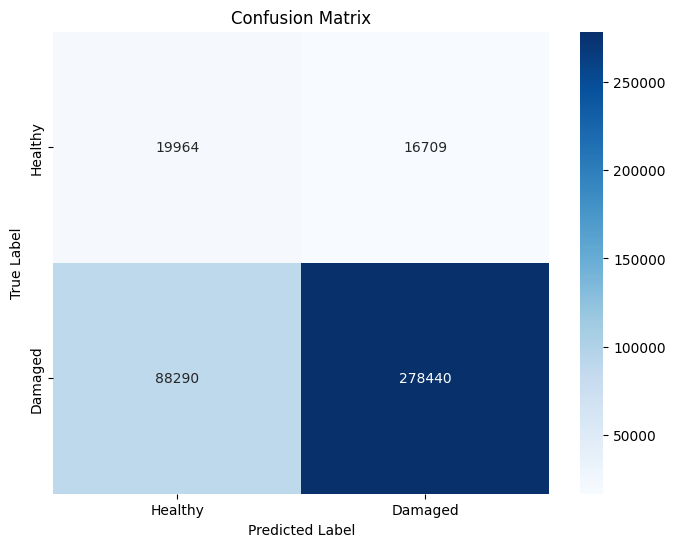

In [38]:
# Avaliar o modelo
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Calcular métricas
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Exibir métricas
metrics = {
    "MSE": [mse],
    "MAE": [mae],
    "Accuracy": [accuracy],
    "Balanced Accuracy": [balanced_accuracy],
    "F1 Score": [f1],
    "Precision": [precision]
}

metrics_df = pd.DataFrame(metrics)
print(metrics_df)

# Plotar matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Healthy', 'Damaged'], yticklabels=['Healthy', 'Damaged'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

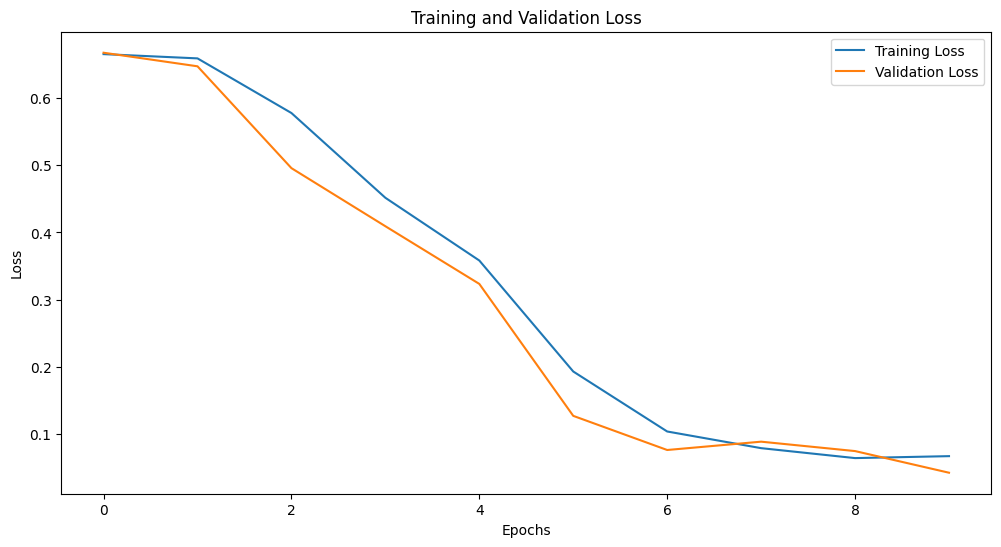

In [39]:
# Plotar gráficos de perda
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [51]:
def list_healthy_files(data_dir):
    healthy_files = [filename for filename in os.listdir(data_dir) if filename.startswith("H")]
    return healthy_files

data_dir = "/Users/enzooliveira/Pessoal/VS CODE/IC/raw data"
healthy_files = list_healthy_files(data_dir)
print("Arquivos Saudáveis Selecionados:", healthy_files)

Arquivos Saudáveis Selecionados: ['H_80Hz.xls', 'H_40Hz.xls', 'H_60Hz.xls', 'H_25hz.xls', 'H_VS_0_40_0Hz.xls', 'H_20Hz.xls', 'H_65Hz.xls', 'H_70Hz.xls', 'H_35Hz.xls', 'H_30Hz.xls', 'H_75Hz.xls']


In [52]:
def read_and_rename_file(file_path):
    df = pd.read_csv(file_path, skiprows=22, header=None, delimiter='\t')
    df.columns = ['indices', 'velocidade', 'AceleracaoX', 'AceleracaoY', 'AceleracaoZ']
    return df

def list_damaged_files(data_dir):
    damaged_files = [filename for filename in os.listdir(data_dir) if not filename.startswith("H")]
    return damaged_files

In [53]:
# Selecionar todos os arquivos danificados
damaged_files = list_damaged_files(data_dir)

# Verificar se temos o mesmo número de arquivos saudáveis e danificados
if len(healthy_files) * 8 != len(damaged_files):
    raise ValueError("O número de arquivos saudáveis multiplicados por 8 deve ser igual ao número de arquivos danificados.")

# Selecionar 11 arquivos saudáveis e multiplicá-los por 8
healthy_files = healthy_files[:11]
healthy_files = healthy_files * 8

all_files = healthy_files + damaged_files
labels = [0] * len(healthy_files) + [1] * len(damaged_files)

print("Arquivos Saudáveis para Treinamento:", healthy_files)
print("Arquivos Danificados para Treinamento:", damaged_files)

window_size = 200
step_size = 50
split_ratio = 0.9
X_train_list, y_train_list = [], []
X_test_list, y_test_list = [], []

for file_path, label in zip(all_files, labels):
    df = read_and_rename_file(os.path.join(data_dir, file_path))
    frequency = [f for f in frequencies if f"{f}Hz" in file_path]
    if frequency:
        frequency = int(frequency[0])
        df['velocidade'] = frequency
        df['Label'] = label
    
        train_size = int(len(df) * split_ratio)
        test_size = len(df) - train_size
        train_data = df[:train_size]
        test_data = df[train_size:]

        if not train_data.empty and not test_data.empty:
            X_train, y_train = create_sliding_windows(train_data, window_size, step_size)
            X_test, y_test = create_sliding_windows(test_data, window_size, step_size)
        
            X_train_list.append(X_train)
            y_train_list.append(y_train)
            X_test_list.append(X_test)
            y_test_list.append(y_test)

X_train = np.vstack(X_train_list)
y_train = np.hstack(y_train_list)
X_test = np.vstack(X_test_list)
y_test = np.hstack(y_test_list)

Arquivos Saudáveis para Treinamento: ['H_80Hz.xls', 'H_40Hz.xls', 'H_60Hz.xls', 'H_25hz.xls', 'H_VS_0_40_0Hz.xls', 'H_20Hz.xls', 'H_65Hz.xls', 'H_70Hz.xls', 'H_35Hz.xls', 'H_30Hz.xls', 'H_75Hz.xls', 'H_80Hz.xls', 'H_40Hz.xls', 'H_60Hz.xls', 'H_25hz.xls', 'H_VS_0_40_0Hz.xls', 'H_20Hz.xls', 'H_65Hz.xls', 'H_70Hz.xls', 'H_35Hz.xls', 'H_30Hz.xls', 'H_75Hz.xls', 'H_80Hz.xls', 'H_40Hz.xls', 'H_60Hz.xls', 'H_25hz.xls', 'H_VS_0_40_0Hz.xls', 'H_20Hz.xls', 'H_65Hz.xls', 'H_70Hz.xls', 'H_35Hz.xls', 'H_30Hz.xls', 'H_75Hz.xls', 'H_80Hz.xls', 'H_40Hz.xls', 'H_60Hz.xls', 'H_25hz.xls', 'H_VS_0_40_0Hz.xls', 'H_20Hz.xls', 'H_65Hz.xls', 'H_70Hz.xls', 'H_35Hz.xls', 'H_30Hz.xls', 'H_75Hz.xls', 'H_80Hz.xls', 'H_40Hz.xls', 'H_60Hz.xls', 'H_25hz.xls', 'H_VS_0_40_0Hz.xls', 'H_20Hz.xls', 'H_65Hz.xls', 'H_70Hz.xls', 'H_35Hz.xls', 'H_30Hz.xls', 'H_75Hz.xls', 'H_80Hz.xls', 'H_40Hz.xls', 'H_60Hz.xls', 'H_25hz.xls', 'H_VS_0_40_0Hz.xls', 'H_20Hz.xls', 'H_65Hz.xls', 'H_70Hz.xls', 'H_35Hz.xls', 'H_30Hz.xls', 'H_75Hz.xl

In [54]:
# Embaralhar os dados de treinamento
indices_train = np.arange(X_train.shape[0])
np.random.shuffle(indices_train)
X_train = X_train[indices_train]
y_train = y_train[indices_train]

# Normalizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
X_test = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

In [55]:
# Definir o modelo
model = Sequential()
model.add(LSTM(128, input_shape=(window_size, 4)))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

/opt/anaconda3/envs/tf-metal/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
22397/22397 ━━━━━━━━━━━━━━━━━━━━ 439s 20ms/step - accuracy: 0.7401 - loss: 0.4505 - val_accuracy: 0.9853 - val_loss: 0.0461
Epoch 2/10
22397/22397 ━━━━━━━━━━━━━━━━━━━━ 448s 20ms/step - accuracy: 0.9865 - loss: 0.0406 - val_accuracy: 0.9943 - val_loss: 0.0179
Epoch 3/10
22397/22397 ━━━━━━━━━━━━━━━━━━━━ 455s 20ms/step - accuracy: 0.9949 - loss: 0.0155 - val_accuracy: 0.9979 - val_loss: 0.0061
Epoch 4/10
22397/22397 ━━━━━━━━━━━━━━━━━━━━ 460s 21ms/step - accuracy: 0.9972 - loss: 0.0089 - val_accuracy: 0.9966 - val_loss: 0.0100
Epoch 5/10
22397/22397 ━━━━━━━━━━━━━━━━━━━━ 465s 21ms/step - accuracy: 0.9981 - loss: 0.0059 - val_accuracy: 0.9930 - val_loss: 0.0181
Epoch 6/10
22397/22397 ━━━━━━━━━━━━━━━━━━━━ 466s 21ms/step - accuracy: 0.9986 - loss: 0.0044 - val_accuracy: 0.9982 - val_loss: 0.0056
Epoch 7/10
22397/22397 ━━━━━━━━━━━━━━━━━━━━ 478s 21ms/step - accuracy: 0.9989 - loss: 0.0037 - val_accuracy: 0.9986 - val_loss: 0.0044
Epoch 8/10
22397/22397 ━━━━━━━━━━━━━━━━━━━━ 476s 21ms/s

2475/2475 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step
        MSE       MAE  Accuracy  Balanced Accuracy  F1 Score  Precision
0  0.002323  0.002323  0.997677           0.997601  0.997795   0.996554


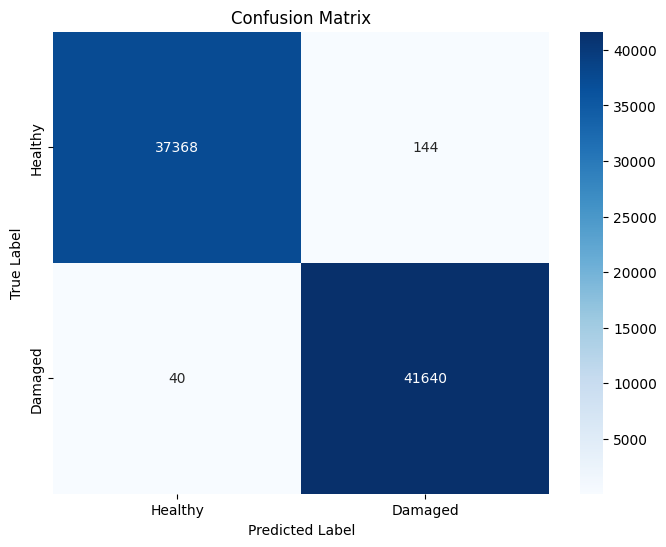

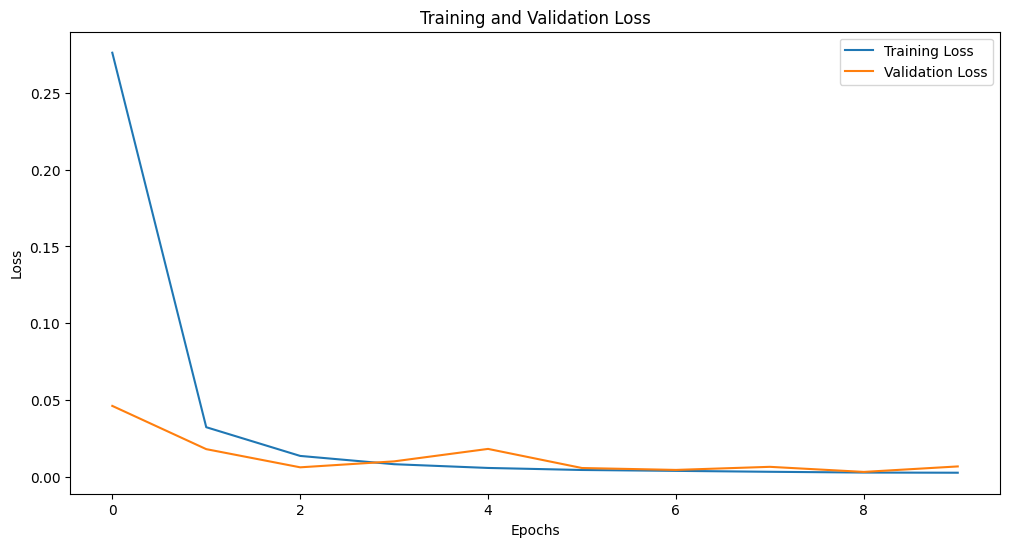

In [56]:
# Avaliar o modelo
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Calcular métricas
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Exibir métricas
metrics = {
    "MSE": [mse],
    "MAE": [mae],
    "Accuracy": [accuracy],
    "Balanced Accuracy": [balanced_accuracy],
    "F1 Score": [f1],
    "Precision": [precision]
}

metrics_df = pd.DataFrame(metrics)
print(metrics_df)

# Plotar matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Healthy', 'Damaged'], yticklabels=['Healthy', 'Damaged'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Plotar gráficos de perda
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

1. **Mesma coisa que o código la em cima, dividindo e definindo a janela deslizante**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(window_size, 4)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10


/opt/anaconda3/envs/tf-metal/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


885/885 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.7557 - loss: 0.4603 - val_accuracy: 0.9626 - val_loss: 0.1009
Epoch 2/10
885/885 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9705 - loss: 0.0846 - val_accuracy: 0.9923 - val_loss: 0.0245
Epoch 3/10
885/885 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9843 - loss: 0.0481 - val_accuracy: 0.9901 - val_loss: 0.0273
Epoch 4/10
885/885 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9891 - loss: 0.0336 - val_accuracy: 0.9965 - val_loss: 0.0134
Epoch 5/10
885/885 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9907 - loss: 0.0271 - val_accuracy: 0.9984 - val_loss: 0.0084
Epoch 6/10
885/885 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9931 - loss: 0.0205 - val_accuracy: 0.9942 - val_loss: 0.0178
Epoch 7/10
885/885 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9939 - loss: 0.0196 - val_accuracy: 0.9958 - val_loss: 0.0156
Epoch 8/10
885/885 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9936 - loss: 0.0197 - val_accuracy: 0.9978 - val_

98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
        MSE       MAE  Accuracy  Balanced Accuracy  F1 Score  Precision
0  0.005758  0.005758  0.994242           0.994242  0.994271   0.989234


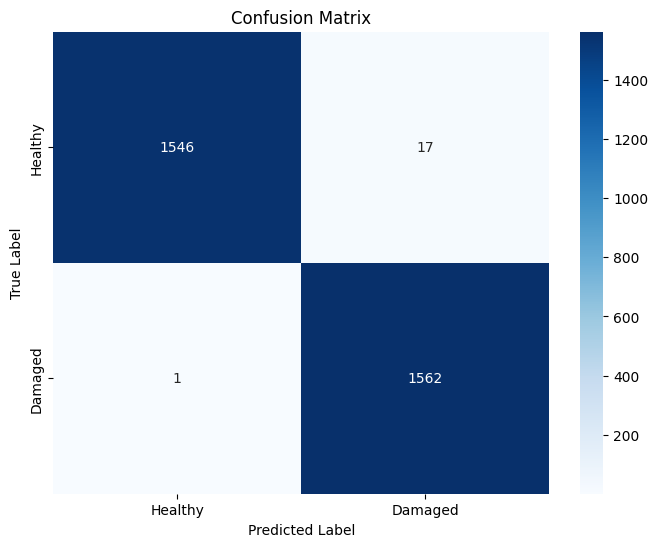

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, balanced_accuracy_score, f1_score, precision_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = (model.predict(X_test) > 0.5).astype("int32")

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

metrics = {
    "MSE": [mse],
    "MAE": [mae],
    "Accuracy": [accuracy],
    "Balanced Accuracy": [balanced_accuracy],
    "F1 Score": [f1],
    "Precision": [precision]
}

metrics_df = pd.DataFrame(metrics)
print(metrics_df)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Healthy', 'Damaged'], yticklabels=['Healthy', 'Damaged'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
def create_sliding_windows(df, window_size, step_size):
    X, y = [], []
    for i in range(0, len(df) - window_size + 1, step_size):
        window = df.iloc[i:i + window_size]
        X.append(window[['AceleracaoX', 'AceleracaoY', 'AceleracaoZ', 'Velocidade']].values)
        y.append(window['Label'].values[-1])
    return np.array(X), np.array(y)

split_ratio = 0.9
def split_train_test(df_list, split_ratio):
    train, test = [], []
    for df in df_list:
        split_index = int(len(df) * split_ratio)
        train.append(df.iloc[:split_index])
        test.append(df.iloc[split_index:])
    return train, test

dataframes = []
for file, label in zip(all_files, labels):
    df = read_and_rename_file(os.path.join(data_dir, file))
    df['Label'] = label
    frequency = int([f for f in frequencies if f"{f}Hz" in file][0])
    df['Velocidade'] = frequency
    dataframes.append(df)

train_dfs, test_dfs = split_train_test(dataframes, split_ratio)

window_sizes = [50, 100, 150, 200]
step_sizes = [50, 100, 150, 200, 250]

total_combinations = len(window_sizes) * len(step_sizes)
metrics_list = []

combination_counter = 0

for window_size in window_sizes:
    for step_size in step_sizes:
        combination_counter += 1
        remaining_combinations = total_combinations - combination_counter
        print(f"Processing combination {combination_counter}/{total_combinations} (Remaining: {remaining_combinations}): Window Size = {window_size}, Step Size = {step_size}")

        X_train_list, y_train_list = [], []
        X_test_list, y_test_list = [], []

        for train_data, test_data in zip(train_dfs, test_dfs):
            X_train, y_train = create_sliding_windows(train_data, window_size, step_size)
            X_train_list.append(X_train)
            y_train_list.append(y_train)

            X_test, y_test = create_sliding_windows(test_data, window_size, step_size)
            X_test_list.append(X_test)
            y_test_list.append(y_test)

        X_train = np.vstack(X_train_list)
        y_train = np.hstack(y_train_list)
        X_test = np.vstack(X_test_list)
        y_test = np.hstack(y_test_list)

        if len(X_train) != len(y_train):
            raise ValueError(f"Mismatch in combined train data shapes: {len(X_train)} != {len(y_train)}")
        if len(X_test) != len(y_test):
            raise ValueError(f"Mismatch in combined test data shapes: {len(X_test)} != {len(y_test)}")

        indices_train = np.arange(X_train.shape[0])
        np.random.shuffle(indices_train)
        X_train = X_train[indices_train]
        y_train = y_train[indices_train]

        indices_test = np.arange(X_test.shape[0])
        np.random.shuffle(indices_test)
        X_test = X_test[indices_test]
        y_test = y_test[indices_test]

        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
        X_test = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

        model = Sequential()
        model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(window_size, 4)))
        model.add(MaxPooling1D(pool_size=2))
        model.add(Flatten())
        model.add(Dense(100, activation='relu'))
        model.add(Dropout(0.3))
        model.add(Dense(1, activation='sigmoid'))

        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

        model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=0)

        y_pred = (model.predict(X_test) > 0.5).astype("int32")

        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        accuracy = accuracy_score(y_test, y_pred)
        balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        
        metrics_list.append({"Window Size": window_size, "Step Size": step_size, "MSE": mse, "MAE": mae, "Accuracy": accuracy, "Balanced Accuracy": balanced_accuracy, "F1 Score": f1, "Precision": precision})

metrics_df = pd.DataFrame(metrics_list)
metrics_df

Processing combination 1/20 (Remaining: 19): Window Size = 50, Step Size = 50


/opt/anaconda3/envs/tf-metal/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Processing combination 2/20 (Remaining: 18): Window Size = 50, Step Size = 100


/opt/anaconda3/envs/tf-metal/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Processing combination 3/20 (Remaining: 17): Window Size = 50, Step Size = 150


/opt/anaconda3/envs/tf-metal/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Processing combination 4/20 (Remaining: 16): Window Size = 50, Step Size = 200


/opt/anaconda3/envs/tf-metal/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Processing combination 5/20 (Remaining: 15): Window Size = 50, Step Size = 250


/opt/anaconda3/envs/tf-metal/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Processing combination 6/20 (Remaining: 14): Window Size = 100, Step Size = 50


/opt/anaconda3/envs/tf-metal/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Processing combination 7/20 (Remaining: 13): Window Size = 100, Step Size = 100


/opt/anaconda3/envs/tf-metal/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Processing combination 8/20 (Remaining: 12): Window Size = 100, Step Size = 150


/opt/anaconda3/envs/tf-metal/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Processing combination 9/20 (Remaining: 11): Window Size = 100, Step Size = 200


/opt/anaconda3/envs/tf-metal/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Processing combination 10/20 (Remaining: 10): Window Size = 100, Step Size = 250


/opt/anaconda3/envs/tf-metal/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Processing combination 11/20 (Remaining: 9): Window Size = 150, Step Size = 50


/opt/anaconda3/envs/tf-metal/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Processing combination 12/20 (Remaining: 8): Window Size = 150, Step Size = 100


/opt/anaconda3/envs/tf-metal/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Processing combination 13/20 (Remaining: 7): Window Size = 150, Step Size = 150


/opt/anaconda3/envs/tf-metal/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Processing combination 14/20 (Remaining: 6): Window Size = 150, Step Size = 200


/opt/anaconda3/envs/tf-metal/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Processing combination 15/20 (Remaining: 5): Window Size = 150, Step Size = 250


/opt/anaconda3/envs/tf-metal/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Processing combination 16/20 (Remaining: 4): Window Size = 200, Step Size = 50


/opt/anaconda3/envs/tf-metal/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Processing combination 17/20 (Remaining: 3): Window Size = 200, Step Size = 100


/opt/anaconda3/envs/tf-metal/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Processing combination 18/20 (Remaining: 2): Window Size = 200, Step Size = 150


/opt/anaconda3/envs/tf-metal/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Processing combination 19/20 (Remaining: 1): Window Size = 200, Step Size = 200


/opt/anaconda3/envs/tf-metal/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Processing combination 20/20 (Remaining: 0): Window Size = 200, Step Size = 250


/opt/anaconda3/envs/tf-metal/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


,Window Size,Step Size,MSE,MAE,Accuracy,Balanced Accuracy,F1 Score,Precision
0,50,50,0.032125,0.032125,0.967875,0.967875,0.967701,0.972990
1,50,100,0.049618,0.049618,0.950382,0.950382,0.950633,0.945844
2,50,150,0.058095,0.058095,0.941905,0.941905,0.941849,0.942748
3,50,200,0.062341,0.062341,0.937659,0.937659,0.936937,0.947917
4,50,250,0.098413,0.098413,0.901587,0.901587,0.899023,0.923077
5,100,50,0.014022,0.014022,0.985978,0.985978,0.985951,0.987844
6,100,100,0.014631,0.014631,0.985369,0.985369,0.985341,0.987229
7,100,150,0.025714,0.025714,0.974286,0.974286,0.974359,0.971591
8,100,200,0.033079,0.033079,0.966921,0.966921,0.967500,0.950860
9,100,250,0.052381,0.052381,0.947619,0.947619,0.945634,0.982877


In [ ]:
best_mse = metrics_df["MSE"].min()
best_mae = metrics_df["MAE"].min()
best_accuracy = metrics_df["Accuracy"].max()
best_balanced_accuracy = metrics_df["Balanced Accuracy"].max()
best_f1 = metrics_df["F1 Score"].max()
best_precision = metrics_df["Precision"].max()

def highlight_best(data):
    attr = 'background-color: red'
    is_best = pd.DataFrame('', index=data.index, columns=data.columns)
    is_best.loc[data['MSE'].idxmin(), 'MSE'] = attr
    is_best.loc[data['MAE'].idxmin(), 'MAE'] = attr
    is_best.loc[data['Accuracy'].idxmax(), 'Accuracy'] = attr
    is_best.loc[data['Balanced Accuracy'].idxmax(), 'Balanced Accuracy'] = attr
    is_best.loc[data['F1 Score'].idxmax(), 'F1 Score'] = attr
    is_best.loc[data['Precision'].idxmax(), 'Precision'] = attr
    return is_best

styled_metrics_df = metrics_df.style.apply(highlight_best, axis=None)

styled_metrics_df

,Window Size,Step Size,MSE,MAE,Accuracy,Balanced Accuracy,F1 Score,Precision
0,50,50,0.032125,0.032125,0.967875,0.967875,0.967701,0.972990
1,50,100,0.049618,0.049618,0.950382,0.950382,0.950633,0.945844
2,50,150,0.058095,0.058095,0.941905,0.941905,0.941849,0.942748
3,50,200,0.062341,0.062341,0.937659,0.937659,0.936937,0.947917
4,50,250,0.098413,0.098413,0.901587,0.901587,0.899023,0.923077
5,100,50,0.014022,0.014022,0.985978,0.985978,0.985951,0.987844
6,100,100,0.014631,0.014631,0.985369,0.985369,0.985341,0.987229
7,100,150,0.025714,0.025714,0.974286,0.974286,0.974359,0.971591
8,100,200,0.033079,0.033079,0.966921,0.966921,0.967500,0.950860
9,100,250,0.052381,0.052381,0.947619,0.947619,0.945634,0.982877


In [ ]:
def create_sliding_windows(df, window_size, step_size):
    X, y = [], []
    for i in range(0, len(df) - window_size + 1, step_size):
        window = df.iloc[i:i + window_size]
        X.append(window[['AceleracaoX', 'AceleracaoY', 'AceleracaoZ', 'Velocidade']].values)
        y.append(window['Label'].values[-1])
    return np.array(X), np.array(y)

window_size = 200
step_size = 50
split_ratio = 0.9

def split_train_test(df_list, split_ratio):
    train, test = [], []
    for df in df_list:
        split_index = int(len(df) * split_ratio)
        train.append(df.iloc[:split_index])
        test.append(df.iloc[split_index:])
    return train, test

dataframes = []
for file, label in zip(all_files, labels):
    df = read_and_rename_file(os.path.join(data_dir, file))
    df['Label'] = label
    frequency = int([f for f in frequencies if f"{f}Hz" in file][0])
    df['Velocidade'] = frequency
    dataframes.append(df)

train_dfs, test_dfs = split_train_test(dataframes, split_ratio)

X_train_list, y_train_list = [], []
X_test_list, y_test_list = [], []

for train_data, test_data in zip(train_dfs, test_dfs):
    X_train, y_train = create_sliding_windows(train_data, window_size, step_size)
    X_train_list.append(X_train)
    y_train_list.append(y_train)

    X_test, y_test = create_sliding_windows(test_data, window_size, step_size)
    X_test_list.append(X_test)
    y_test_list.append(y_test)

X_train = np.vstack(X_train_list)
y_train = np.hstack(y_train_list)
X_test = np.vstack(X_test_list)
y_test = np.hstack(y_test_list)

if len(X_train) != len(y_train):
    raise ValueError(f"Mismatch in combined train data shapes: {len(X_train)} != {len(y_train)}")
if len(X_test) != len(y_test):
    raise ValueError(f"Mismatch in combined test data shapes: {len(X_test)} != {len(y_test)}")

indices_train = np.arange(X_train.shape[0])
np.random.shuffle(indices_train)
X_train = X_train[indices_train]
y_train = y_train[indices_train]

indices_test = np.arange(X_test.shape[0])
np.random.shuffle(indices_test)
X_test = X_test[indices_test]
y_test = y_test[indices_test]

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
X_test = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

models_to_test = [
    {"name": "CNN(32 filters)", "layers": [Conv1D(32, 3, activation='relu', input_shape=(window_size, 4)), MaxPooling1D(2), Flatten(), Dense(100, activation='relu'), Dropout(0.3), Dense(1, activation='sigmoid')]},
    {"name": "CNN(64 filters)", "layers": [Conv1D(64, 3, activation='relu', input_shape=(window_size, 4)), MaxPooling1D(2), Flatten(), Dense(100, activation='relu'), Dropout(0.3), Dense(1, activation='sigmoid')]},
    {"name": "CNN(128 filters)", "layers": [Conv1D(128, 3, activation='relu', input_shape=(window_size, 4)), MaxPooling1D(2), Flatten(), Dense(100, activation='relu'), Dropout(0.3), Dense(1, activation='sigmoid')]},
    {"name": "CNN(64 filters) + Dropout(0.2)", "layers": [Conv1D(64, 3, activation='relu', input_shape=(window_size, 4)), MaxPooling1D(2), Flatten(), Dense(100, activation='relu'), Dropout(0.2), Dense(1, activation='sigmoid')]},
    {"name": "CNN(64 filters) + Dropout(0.5)", "layers": [Conv1D(64, 3, activation='relu', input_shape=(window_size, 4)), MaxPooling1D(2), Flatten(), Dense(100, activation='relu'), Dropout(0.5), Dense(1, activation='sigmoid')]},
    {"name": "CNN(64 filters) + Kernel Size 5", "layers": [Conv1D(64, 5, activation='relu', input_shape=(window_size, 4)), MaxPooling1D(2), Flatten(), Dense(100, activation='relu'), Dropout(0.3), Dense(1, activation='sigmoid')]},
    {"name": "CNN(64 filters) + Pooling Size 3", "layers": [Conv1D(64, 3, activation='relu', input_shape=(window_size, 4)), MaxPooling1D(3), Flatten(), Dense(100, activation='relu'), Dropout(0.3), Dense(1, activation='sigmoid')]},
]

metrics_list = []

for model_config in models_to_test:
    model_name = model_config["name"]
    layers = model_config["layers"]

    print(f"Training model: {model_name}")
    
    model = Sequential()
    for layer in layers:
        model.add(layer)

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=0)

    y_pred = (model.predict(X_test) > 0.5).astype("int32")

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    metrics_list.append({"Model": model_name, "MSE": mse, "MAE": mae, "Accuracy": accuracy, "Balanced Accuracy": balanced_accuracy, "F1 Score": f1, "Precision": precision})

metrics_df = pd.DataFrame(metrics_list)
metrics_df.style.highlight_max(color='red', axis=0)

Shape of X_train: (28290, 200, 4)
Shape of y_train: (28290,)
Shape of X_test: (3126, 200, 4)
Shape of y_test: (3126,)
Training model: CNN(32 filters)


/opt/anaconda3/envs/tf-metal/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Training model: CNN(64 filters)
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Training model: CNN(128 filters)
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Training model: CNN(64 filters) + Dropout(0.2)
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Training model: CNN(64 filters) + Dropout(0.5)
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Training model: CNN(64 filters) + Kernel Size 5
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Training model: CNN(64 filters) + Pooling Size 3
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Model,MSE,MAE,Accuracy,Balanced Accuracy,F1 Score,Precision
0,CNN(32 filters),0.003839,0.003839,0.996161,0.996161,0.996154,0.998073
1,CNN(64 filters),0.004479,0.004479,0.995521,0.995521,0.995516,0.996793
2,CNN(128 filters),0.013116,0.013116,0.986884,0.986884,0.986736,0.998037
3,CNN(64 filters) + Dropout(0.2),0.003519,0.003519,0.996481,0.996481,0.996475,0.998074
4,CNN(64 filters) + Dropout(0.5),0.006398,0.006398,0.993602,0.993602,0.993565,0.999353
5,CNN(64 filters) + Kernel Size 5,0.003199,0.003199,0.996801,0.996801,0.996797,0.998076
6,CNN(64 filters) + Pooling Size 3,0.004798,0.004798,0.995202,0.995202,0.995181,0.999355
